In [1]:
import matplotlib.pyplot as plt

In [2]:
def compute_speedup(time, time_optim):
    speedup = []
    for i in range(len(time)):
        speedup.append(time[i] / time_optim[i])
    
    return speedup

[3.602543720190779, 4.041916167664671, 4.757859900717043, 4.330652790917692, 4.989896818572657]
[4.851986754966887, 5.212000933924819, 5.169801570897065, 5.325904624970046, 5.3029562506604675]
[5.5911602209944755, 5.726726291776804, 5.804337333891052, 5.728580282922561, 5.782836305428173]

[2.340222575516693, 2.0053892215568863, 2.175675675675676, 2.2708924629454432, 2.207939237603898]
[1.9374172185430463, 1.7174877422367498, 1.6052604381976023, 1.6545351066379104, 1.6654998414879003]
[1.6485979359949963, 1.6707824890466019, 1.72425110203031, 1.5607317339944582, 1.5722470180367432]


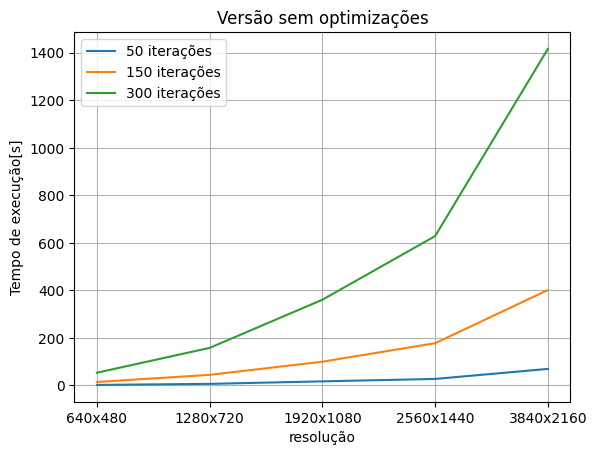

In [3]:
res = ['640x480', '1280x720', '1920x1080', '2560x1440', '3840x2160']
time_50 = [2.266, 6.750, 17.252, 27.465, 69.639]
time_150 = [14.653, 44.646, 100.046, 177.800, 401.455]
time_300 = [53.636, 158.155, 360.786, 628.494, 1416.153]

time_omp_50 = [1.472, 3.349, 7.889, 14.402, 30.814]
time_omp_150 = [5.851, 14.712, 31.065, 55.235, 126.085]
time_omp_300 = [15.815, 46.142, 107.176, 171.231, 385.026]

time_omp2_50 = [0.629, 1.670, 3.626, 6.342, 13.956]
time_omp2_150 = [3.020, 8.566, 19.352, 33.384, 75.704]
time_omp2_300 = [9.593, 27.617, 62.158, 109.712, 244.889]

speedup_omp_50 = compute_speedup(time_50, time_omp_50)
speedup_omp_150 = compute_speedup(time_150, time_omp_150)
speedup_omp_300 = compute_speedup(time_300, time_omp_300)

speedup_omp2_50 = compute_speedup(time_50, time_omp2_50)
speedup_omp2_150 = compute_speedup(time_150, time_omp2_150)
speedup_omp2_300 = compute_speedup(time_300, time_omp2_300)

speedup_omp_omp_50 = compute_speedup(time_omp_50, time_omp2_50)
speedup_omp_omp_150 = compute_speedup(time_omp_150, time_omp2_150)
speedup_omp_omp_300 = compute_speedup(time_omp_300, time_omp2_300)

plt.plot(res, time_50, label='50 iterações');
plt.plot(res, time_150, label='150 iterações');
plt.plot(res, time_300, label='300 iterações');
plt.xlabel('resolução')
plt.ylabel('Tempo de execução[s]')
plt.legend();
plt.grid();
plt.title('Versão sem optimizações');

print(speedup_omp2_50)
print(speedup_omp2_150)
print(speedup_omp2_300)
print()
print(speedup_omp_omp_50)
print(speedup_omp_omp_150)
print(speedup_omp_omp_300)


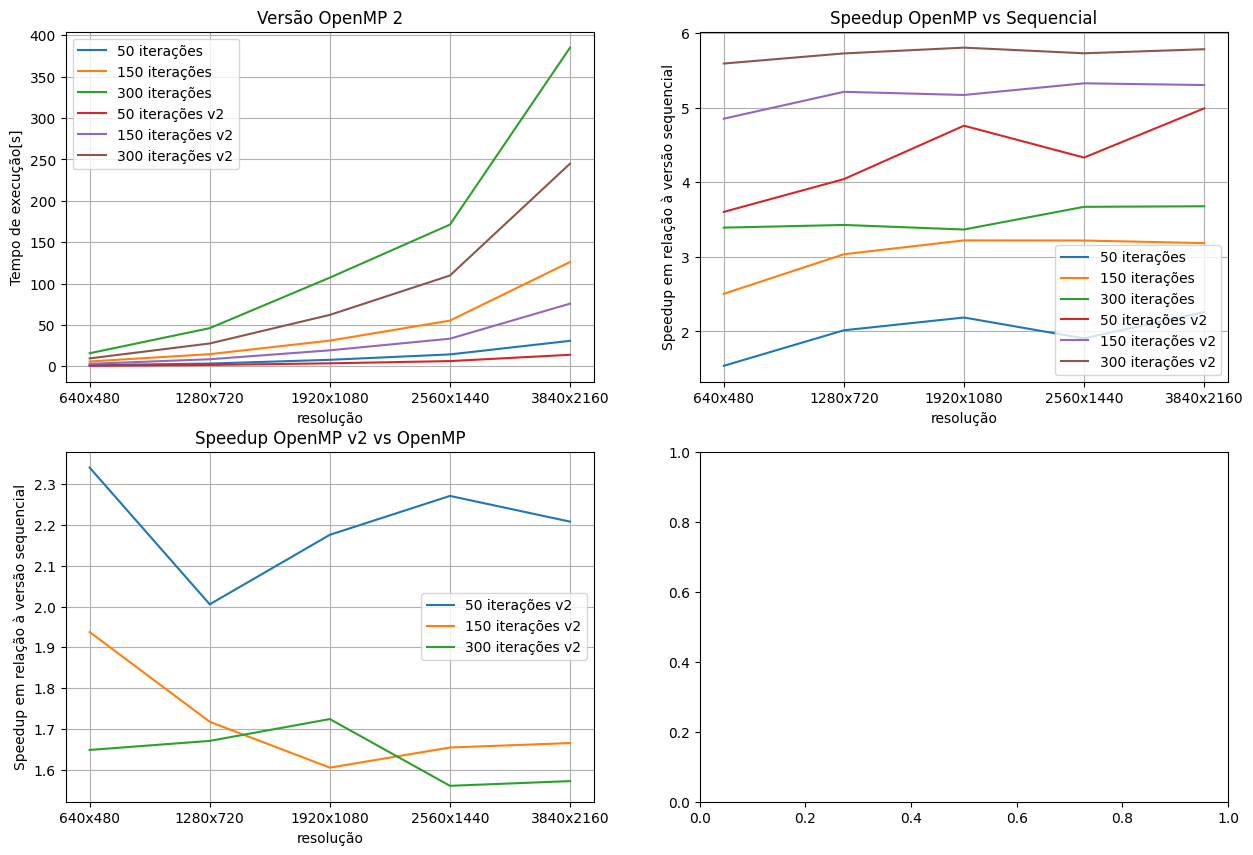

In [4]:
fig, ax = plt.subplots(2, 2, figsize=(15, 10))

ax[0][0].plot(res, time_omp_50, label='50 iterações');
ax[0][0].plot(res, time_omp_150, label='150 iterações');
ax[0][0].plot(res, time_omp_300, label='300 iterações');
ax[0][0].set_xlabel('resolução')
ax[0][0].set_ylabel('Tempo de execução[s]')
ax[0][0].legend();
ax[0][0].grid();
ax[0][0].set_title('Versão OpenMP');

ax[0][1].plot(res, speedup_omp_50, label='50 iterações');
ax[0][1].plot(res, speedup_omp_150, label='150 iterações');
ax[0][1].plot(res, speedup_omp_300, label='300 iterações');
ax[0][1].set_xlabel('resolução');
ax[0][1].set_ylabel('Speedup em relação à versão sequencial');
ax[0][1].legend();
ax[0][1].grid();
ax[0][1].set_title('Speedup OpenMP vs Sequencial');

ax[0][0].plot(res, time_omp2_50, label='50 iterações v2');
ax[0][0].plot(res, time_omp2_150, label='150 iterações v2');
ax[0][0].plot(res, time_omp2_300, label='300 iterações v2');
ax[0][0].set_xlabel('resolução')
ax[0][0].set_ylabel('Tempo de execução[s]')
ax[0][0].legend();
ax[0][0].set_title('Versão OpenMP 2');

ax[0][1].plot(res, speedup_omp2_50, label='50 iterações v2');
ax[0][1].plot(res, speedup_omp2_150, label='150 iterações v2');
ax[0][1].plot(res, speedup_omp2_300, label='300 iterações v2');
ax[0][1].set_xlabel('resolução');
ax[0][1].set_ylabel('Speedup em relação à versão sequencial');
ax[0][1].legend();
ax[0][1].set_title('Speedup OpenMP vs Sequencial');

ax[1][0].plot(res, speedup_omp_omp_50, label='50 iterações v2');
ax[1][0].plot(res, speedup_omp_omp_150, label='150 iterações v2');
ax[1][0].plot(res, speedup_omp_omp_300, label='300 iterações v2');
ax[1][0].set_xlabel('resolução');
ax[1][0].set_ylabel('Speedup em relação à versão sequencial');
ax[1][0].legend();
ax[1][0].set_title('Speedup OpenMP v2 vs OpenMP');
ax[1][0].grid();